In [82]:
import staircase as sc
from imports import *
import operator
import warnings
from hotstepper.core.AbstractSteps import AbstractSteps
from hotstepper.utilities.helpers import *
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv(r"..//data/vessel_queue.csv", parse_dates=['enter', 'leave'], dayfirst=True)
vsteps = Steps(use_datetime=True).add_direct(df.enter,df.leave)


<AxesSubplot:>

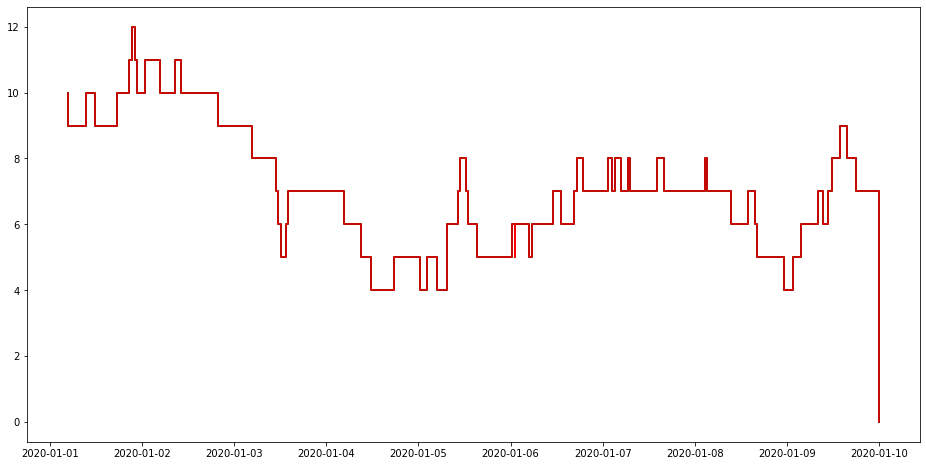

In [3]:
clip_step_end = Step(end=pd.Timestamp(2020,1,10))
steps_end = Steps(True).add_direct([None],[pd.Timestamp(2020,1,10)])
clip_step_start = Step(start=pd.Timestamp(2020,5,1))

ax = vsteps.clip(ubound=pd.Timestamp(2020,1,10)).plot(color='g')
(vsteps*clip_step_end).plot(ax=ax,color='black')
(vsteps*steps_end).plot(ax=ax,color='r')


In [108]:
aggregation_function = np.subtract
vsteps*clip_step_end
steps_array = [vsteps,clip_step_end]

keys = np.sort(np.unique(np.concatenate([s.step_keys() for s in steps_array if isinstance(s,AbstractSteps)])))
stack = np.array([s(keys) if isinstance(s,AbstractSteps) else s for s in steps_array])

#keys = np.sort(np.unique(np.concatenate([s.step_keys() for s in steps_array])))

#values1 = vsteps(keys)
#values2 = clip_step_end(keys)

#stack=np.array([s(keys) for s in steps_array])
#result = np.diff(aggregation_function(stack).T,prepend=0)
#result = np.diff(aggregation_function(stack,axis=0),prepend=0)
#result = aggregation_function(stack,axis=0)
#result = np.diff(aggregation_function(*stack),prepe
# nd=0)
result = aggregation_function(*stack)
print(result[:3])
print(stack[:3,])


[9. 8. 9.]
[array([10.,  9., 10., ..., 16., 17., 16.]) 1]


array([[10.,  9., 10., ..., 16., 17., 16.],
       [ 1.,  1.,  1., ...,  0.,  0.,  0.]])

In [84]:
isinstance(vsteps,AbstractSteps)

True